In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [3]:
# taking train and test values as numpy arrays
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

X_test = test.drop('label', axis=1).values
y_test = test['label'].values

In [4]:
X_test.shape

(10000, 784)

In [5]:
# n rows of 2x2 data in 1 sheet each
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [6]:
# normalization of data
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [7]:
model = Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [9]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

In [10]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.005,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [11]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64 ,validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/20
938/938 [==============================] - 7s 8ms/step - loss: 0.2527 - accuracy: 0.9194 - val_loss: 0.0576 - val_accuracy: 0.9814
Epoch 2/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0746 - accuracy: 0.9777 - val_loss: 0.0371 - val_accuracy: 0.9875
Epoch 3/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0326 - val_accuracy: 0.9895
Epoch 4/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 5/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0241 - val_accuracy: 0.9918
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0252 - val_accuracy: 0.9924
Epoch 7/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.0276 - val_accuracy: 0.9914
Epoch 

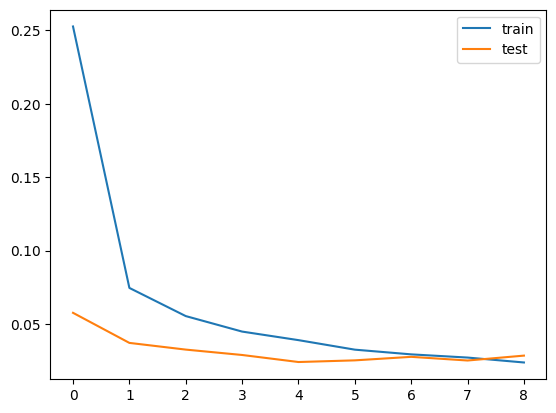

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

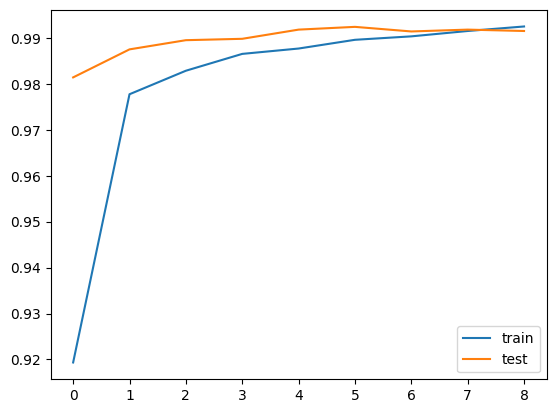

In [17]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

In [19]:
accuracy

0.989799976348877